# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیاده سازی pop effect در opencv</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
پیدا کردن کد HSV رنگ مورد نظر
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global img
    if event == cv2.EVENT_LBUTTONDOWN:
        bgr = img[x:x+1,y:y+1,:]
        print("BGR: ", bgr)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        print("HSV: ", hsv)
        cv2.circle(img,(x,y),5,(0,255,0),+2)

# Create a black image, a window and bind the function to window
img = cv2.imread("images/PopEffects.jpeg")

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()



BGR:  [[[30 28 57]]]
HSV:  [[[178 130  57]]]


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
تابعی برای فیلتر کردن نواحی رنگی تصویر و سطح خاکستری کردن سایر تصویر</div>

In [2]:
def pop_efect(image, lower, upper):
    img = image.copy()
    #convert the BGR image to HSV colour space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #obtain the grayscale image of the original image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #create a mask using the bounds set
    mask = cv2.inRange(hsv, lower, upper)
    #create an inverse of the mask
    mask_inv = cv2.bitwise_not(mask)
    #Take only region of image from the mask
    res = cv2.bitwise_and(img, img, mask=mask)
    #Filter the regions containing colors other than masked region from the grayscale image
    background = cv2.bitwise_and(gray, gray, mask = mask_inv)
    #convert the one channelled grayscale background to a three channelled image
    background = cv2.merge([background]*3)
    #add the color region to gray image
    return cv2.add(res, background)

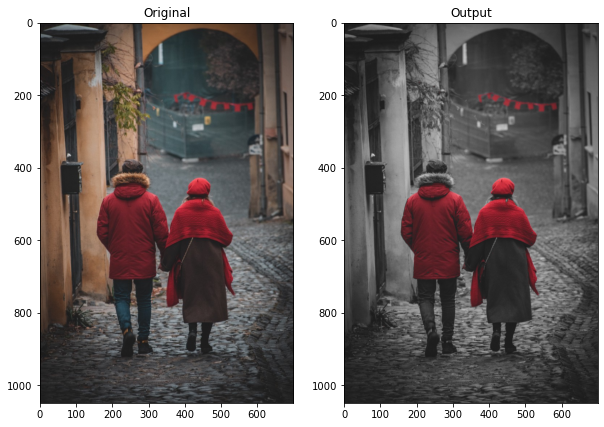

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# mouse callback function
def apply_pop_efect(event,x,y,flags,param, crange=10):
    global image, new_image
    if event == cv2.EVENT_LBUTTONDOWN:
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = hsv[x,y,:]
        lower_h = max(0, h-crange)
        upper_h = min(179, h+crange)
        #set the bounds for the red hue
        lower = np.array([lower_h,50,50])
        upper = np.array([upper_h,255,255])
        new_image = pop_efect(image, lower, upper)
        cv2.imshow("result", new_image)
        
        
# Create a black image, a window and bind the function to window
image = cv2.imread("images/PopEffects.jpeg")
new_image = image.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image',apply_pop_efect)

while True:
    cv2.imshow('image',image)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
            
plt.figure(figsize=[10,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output");

Thanks to: https://medium.com/featurepreneur/colour-filtering-and-colour-pop-effects-using-opencv-python-3ce7d4576140